In [6]:
import numpy as np
import torch

data_list = [1, 2, 3]

data_array = np.array([1, 2, 3])

data_tensor = torch.tensor([1, 2, 3])

print(type(data_list))
print(type(data_array))
print(type(data_tensor))

<class 'list'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [7]:
import numpy as np
import torch

data_tensor = torch.tensor([1, 2, 3])
print(data_tensor.dtype)

data_tensor = torch.tensor([1., 2., 3.])
print(data_tensor.dtype)

float_tensor = torch.tensor([1, 2, 3], dtype=torch.float64)
print(float_tensor.dtype)

int_tensor = torch.tensor([1.1, 2.2, 3.8], dtype=torch.int)
print(int_tensor.dtype)
print(int_tensor)

convert_tensor = float_tensor.to(dtype=torch.float32)
print(float_tensor.dtype)

torch.int64
torch.float32
torch.float64
torch.int32
tensor([1, 2, 3], dtype=torch.int32)
torch.float64


In [3]:
import numpy as np
import torch

print(torch.cuda.is_available())

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

gpu_tensor = torch.tensor([1, 2, 3], dtype=torch.float64, device=device)
gpu_tensor = torch.tensor([1, 2, 3], dtype=torch.float64).to (device)
print(gpu_tensor.dtype)
print(gpu_tensor.device)

cpu_tensor = gpu_tensor.cpu()
cpu_tensor = gpu_tensor.to('cpu')

False
torch.float64
cpu


In [4]:
import torch
import torch.nn as nn                      #모델은 torch.nn에 다 들어있음

class MyModel(nn.Module):                  #pytorch 라이브러리에서 상속
    def __init__(self):                    #init함수(초기화), 필요한 네트워크 정의, 변수 정의
        super(MyModel, self).__init__()    #부모로 부터 상속 받아 초기화

    def forward(self, x):                  #feedforward network, 초기화 진행
        return 0

nn.Linear(4, 1)

Linear(in_features=4, out_features=1, bias=True)

In [1]:
import torch
import torch.nn as nn

class My(nn.Module):
    def __init__(self):
        super(My, self).__init__()
        self.ll = nn.Linear(1, 1)

    def forward(self, x):
        out = self.ll(x)

        return out

model = My()

hours = torch.FloatTensor([1,2,3,4,5,6])      #  -> 데이터[배치, 크기] = [6,1]
print(hours.shape)
hours = hours.view(-1, 1)                     #모양을 바꿔주기 위해 view를 사용(python에서 reshape) [6,1] 변환
print(hours.shape)

print(model(hours))

torch.Size([6])
torch.Size([6, 1])
tensor([[-0.3836],
        [-0.6698],
        [-0.9560],
        [-1.2422],
        [-1.5284],
        [-1.8146]], grad_fn=<AddmmBackward0>)


In [11]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)         #model에 parameter를 넘겨줌, lr = learning rate
                 #Stochastic Gradient Descent(SGD) // Gradient 구간을 mini-batch-size 만큼 나누어 parameter를 업데이트 하는 알고리즘
                 #이점 : 모델의 parameter를 즉각적으로 업데이트 할 수 있다. 메모리를 덜 사용한다. 업데이트 시간이 적게 걸린다.

In [12]:
h = np.array([2, 3, 4, 5, 6, 7])
s = np.array([25, 49, 42, 57, 72, 68])

hours=torch.FloatTensor(h).view(-1,1)
score=torch.FloatTensor(s).view(-1,1)

num_epochs=1000

for epoch in range(num_epochs):
    # Forward pass
    outputs=model(hours)
    # Backward and optimize
    optimizer.zero_grad()
    loss=criterion(outputs, score)
    loss.backward()
    optimizer.step()
    
    if(epoch+1) % 100 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch[100/1000], Loss: 50.2860
Epoch[200/1000], Loss: 46.4356
Epoch[300/1000], Loss: 44.0668
Epoch[400/1000], Loss: 42.6094
Epoch[500/1000], Loss: 41.7129
Epoch[600/1000], Loss: 41.1613
Epoch[700/1000], Loss: 40.8219
Epoch[800/1000], Loss: 40.6132
Epoch[900/1000], Loss: 40.4847
Epoch[1000/1000], Loss: 40.4057


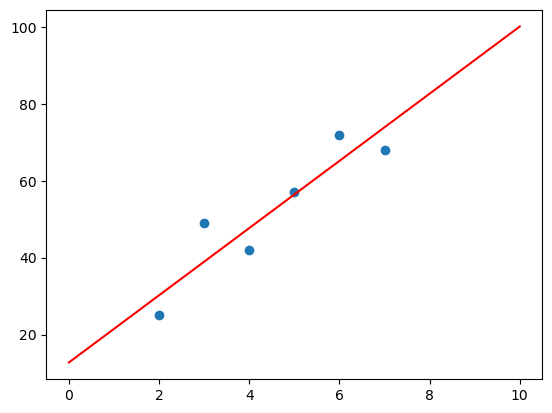

In [13]:
import matplotlib.pyplot as plt

model.eval()

plt.plot(h, s, 'o')

x = torch.linspace(0, 10, 10)
predict = model(x.view(-1, 1))
predict = predict.detach().numpy()
plt.plot(x.numpy(), predict, 'r')

plt.show()

In [14]:
import torch
import torch.nn as nn

class Mymodel(nn.Module):
    def __init__(self):
        super(Mymodel, self).__init__()
        self.l1 = nn.Linear(1,1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        out = self.l1(x)
        out = self.activation(out)
        
        return out

model = Mymodel()

hours = torch.FloatTensor([10, 7, 5, 4])
hours = hours.view(-1, 1)

print(model(hours))

tensor([[9.6231e-05],
        [1.7987e-03],
        [1.2547e-02],
        [3.2639e-02]], grad_fn=<SigmoidBackward0>)


In [15]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

h = np.array([10, 7, 5, 4])
s = np.array([1, 1, 0, 0])

hours = torch.FloatTensor(h).view(-1,1)    #배치
score = torch.FloatTensor(s).view(-1,1)

num_epochs = 20000                     #20000번 학습

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(hours)
    loss = criterion(outputs, score)

    # Backward and optimize
    optimizer.zero_grad()           #optimizer 초기화
    loss.backward()                 #미분값 계산
    optimizer.step()                #업데이트 진행

    if(epoch+1) % 100 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')          #100번 학습마다 결과 확인

Epoch[100/20000], Loss: 0.6438
Epoch[200/20000], Loss: 0.5628
Epoch[300/20000], Loss: 0.4993
Epoch[400/20000], Loss: 0.4490
Epoch[500/20000], Loss: 0.4085
Epoch[600/20000], Loss: 0.3755
Epoch[700/20000], Loss: 0.3481
Epoch[800/20000], Loss: 0.3250
Epoch[900/20000], Loss: 0.3053
Epoch[1000/20000], Loss: 0.2882
Epoch[1100/20000], Loss: 0.2733
Epoch[1200/20000], Loss: 0.2601
Epoch[1300/20000], Loss: 0.2484
Epoch[1400/20000], Loss: 0.2379
Epoch[1500/20000], Loss: 0.2284
Epoch[1600/20000], Loss: 0.2198
Epoch[1700/20000], Loss: 0.2119
Epoch[1800/20000], Loss: 0.2046
Epoch[1900/20000], Loss: 0.1979
Epoch[2000/20000], Loss: 0.1917
Epoch[2100/20000], Loss: 0.1859
Epoch[2200/20000], Loss: 0.1805
Epoch[2300/20000], Loss: 0.1754
Epoch[2400/20000], Loss: 0.1707
Epoch[2500/20000], Loss: 0.1662
Epoch[2600/20000], Loss: 0.1620
Epoch[2700/20000], Loss: 0.1581
Epoch[2800/20000], Loss: 0.1543
Epoch[2900/20000], Loss: 0.1507
Epoch[3000/20000], Loss: 0.1473
Epoch[3100/20000], Loss: 0.1441
Epoch[3200/20000]

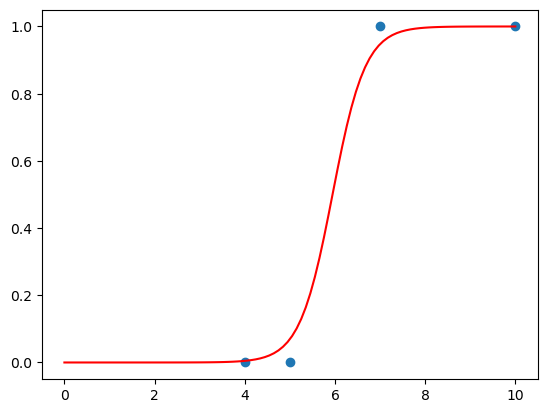

In [16]:
# evaluation
import matplotlib.pyplot as plt

model.eval()

plt.plot(h, s, 'o')

x=torch.linspace(0, 10, 100)
predict=model(x.view(-1,1))
predict=predict.detach().numpy()

plt.plot(x.numpy(), predict, 'r')
plt.show()

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

class XOR_gate(nn.Module):
    def __init__(self):
        super(XOR_gate, self).__init__()
        self.l1 = nn.Linear(2,8)
        self.l2 = nn.Linear(8,4)
        self.l3 = nn.Linear(4,1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        out = self.l1(x)
        out = self.activation(out)
        out = self.l2(out)
        out = self.activation(out)
        out = self.l3(out)
        out = self.activation(out)

        return out

model = XOR_gate()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

x_t = torch.FloatTensor(x).view(x.shape[0], -1)
y_t = torch.FloatTensor(y).view(y.shape[0], 1)

num_epochs = 20000

for epoch in range(num_epochs):
    outputs = model(x_t)
    loss = criterion(outputs, y_t)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/20000], Loss: 0.2499
Epoch [200/20000], Loss: 0.2499
Epoch [300/20000], Loss: 0.2499
Epoch [400/20000], Loss: 0.2499
Epoch [500/20000], Loss: 0.2499
Epoch [600/20000], Loss: 0.2499
Epoch [700/20000], Loss: 0.2499
Epoch [800/20000], Loss: 0.2499
Epoch [900/20000], Loss: 0.2499
Epoch [1000/20000], Loss: 0.2499
Epoch [1100/20000], Loss: 0.2499
Epoch [1200/20000], Loss: 0.2499
Epoch [1300/20000], Loss: 0.2499
Epoch [1400/20000], Loss: 0.2499
Epoch [1500/20000], Loss: 0.2499
Epoch [1600/20000], Loss: 0.2499
Epoch [1700/20000], Loss: 0.2499
Epoch [1800/20000], Loss: 0.2499
Epoch [1900/20000], Loss: 0.2499
Epoch [2000/20000], Loss: 0.2499
Epoch [2100/20000], Loss: 0.2499
Epoch [2200/20000], Loss: 0.2499
Epoch [2300/20000], Loss: 0.2499
Epoch [2400/20000], Loss: 0.2499
Epoch [2500/20000], Loss: 0.2499
Epoch [2600/20000], Loss: 0.2499
Epoch [2700/20000], Loss: 0.2498
Epoch [2800/20000], Loss: 0.2498
Epoch [2900/20000], Loss: 0.2498
Epoch [3000/20000], Loss: 0.2498
Epoch [3100/20000],

In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data=[[73, 80, 75],
                    [93, 88, 93],
                    [89, 91, 90],
                    [96, 98, 100],
                    [73, 66, 70]]

        self.y_data=[[152], [185], [180], [196], [142]]

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):                       #getitem에서 return한 값이 dataloder로 출력
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        
        return x, y
        
dataset = CustomDataset()

In [9]:
from torch.utils.data import DataLoader

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

data, label = next(iter(dataloader))

print(data.shape)
print(data)

print(label.shape)
print(label)

torch.Size([2, 3])
tensor([[73., 80., 75.],
        [93., 88., 93.]])
torch.Size([2, 1])
tensor([[152.],
        [185.]])
